Load Tensorflow

In [ ]:
#Import tensorflow
import tensorflow as tf

Collect Data


In [ ]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

In [ ]:
trainX.shape

## Visualize the Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Function to display test image

def show_random_test_image():
  img_num = np.random.randint(0, testX.shape[0])
  plt.imshow(testX[img_num], cmap='gray')
  plt.suptitle('Number: '+ str(testY[img_num]))
  plt.show()

In [ ]:
show_random_test_image()

Convert Output label to probabilities

In [ ]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [ ]:
testY[0]

## Build the Model(or Graph)

In [ ]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

Reshape data from 2D to 3D -> [28,28] to [28,28,1] . This is needed as Convolutional layer works with 3D images. Note that our input data shape is (28,28) for MNIST

In [ ]:
model.add(tf.keras.layers.Reshape((28,28,1,), input_shape=(28,28,)))

In [ ]:
#Normalize the Data
model.add(tf.keras.layers.BatchNormalization())

Apply Convolutional Layers , MaxPooling .
we will build a model with 2 Convolutional layers and One Max Pooling layer as Hidden Layers

In [ ]:
#Add first Conv Layer
#Number of filters to build - 32
#Size of Filter 3X3
#Stride 1(default in keras)
#Padding 0 (deafult in keras)

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

In [ ]:
#Add second Conv Layer
#Number of filters to build - 32
#Size of Filter 3X3
#Stride 1(default in keras)
#Padding 0 (deafult in keras)

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

In [ ]:
#Add MaxPooling Layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

<h2>Add Additional layers</h2>

First , we will flatten the data i.e. convert 3D data to 1D for use with Dense Layers

In [ ]:
#Flatten the Output
model.add(tf.keras.layers.Flatten())

In [ ]:
#Dense Layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add dropout layer
model.add(tf.keras.layers.Dropout(0.25))

Output Layer : Dense layer to create 10 equation whixh provide 10 outputs after applying softmax

In [ ]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

<h2>Compile the Model</h2>

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<h2>Train the Model</h2>

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)

In [23]:
history = model.fit(trainX, trainY,
                    epochs=10, validation_data=(testX, testY),
                    batch_size = 128,
                    callbacks=[early_stopping])

Epoch 1/10
469/469 [==============================] - 55s 115ms/step - loss: 0.1572 - accuracy: 0.9517 - val_loss: 0.0504 - val_accuracy: 0.9841
Epoch 2/10
469/469 [==============================] - 59s 126ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0329 - val_accuracy: 0.9889
Epoch 3/10
469/469 [==============================] - 54s 115ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0322 - val_accuracy: 0.9888
Epoch 4/10
469/469 [==============================] - 56s 120ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0340 - val_accuracy: 0.9899
Epoch 5/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0305 - val_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 56s 119ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0273 - val_accuracy: 0.9919
Epoch 7/10
469/469 [==============================] - 57s 121ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0250 - val_ac

In [24]:
test_loss, test_accuracy = model.evaluate(testX, testY)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0398 - accuracy: 0.9893
Test Loss: 0.039849840104579926
Test Accuracy: 0.989300012588501


In [25]:
from Notebook.DSNotebook.NotebookExecutor import NotebookExecutor
nb = NotebookExecutor()
saved_model = nb.save_model(model = model, modelName = 'cnn_mnist', modelType = 'cv', X = None, y = None, estimator_type='')
#X and y are training datasets to get explainer dashboard.
#estimator_type is to specify algorithm type i.e., classification and regression.
#Only 'ml’ models with tabular data as input will support in Explainer Dashboard.
#Choose modelType = 'ml' for machine learning models, modelType = 'cv' for computer vision models and modelType = 'dp' for data transformation pickle files. 
#Provide ‘column_headers’ as a parameter if they have to be saved in the model.
#If using custom layer in keras, use native save functionality from keras.

WARN: Training data is not provided. Unable to generate Explainer Dashboard


## Model Prediction

Predict on test image

It tells us model can take any number of examples as in put ('None' in shape) and each example should have 28x28 shape (2D).

In [26]:
#Shape of each example in test dataset
testX[0].shape

(28, 28)

In [27]:
#Make it 3 dimension shape i.e make it (1,28,28). This will mean one example with that example having a shape of 28x28
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

Model prediction

In [28]:
#Model prediction
pred = model.predict(input_data)
pred

1/1 [==============================] - 0s 67ms/step


array([[4.85785694e-14, 1.06029294e-13, 5.77316569e-13, 7.39366762e-11,
        8.75120115e-12, 7.43171665e-14, 1.00398459e-19, 1.00000000e+00,
        6.88121570e-14, 4.34751213e-09]], dtype=float32)

Model will predict 10 probabilities for each input example

In [29]:
#Model prediction shape
pred.shape

(1, 10)

In [30]:
#Model prediction for first example
pred[0]

array([4.85785694e-14, 1.06029294e-13, 5.77316569e-13, 7.39366762e-11,
       8.75120115e-12, 7.43171665e-14, 1.00398459e-19, 1.00000000e+00,
       6.88121570e-14, 4.34751213e-09], dtype=float32)

Find the number for which probability is highest using 'argmax' function

In [31]:
#This gives us predicted label
np.argmax(pred[0])

7

In [32]:
#Actual label
np.argmax(testY[0])

7

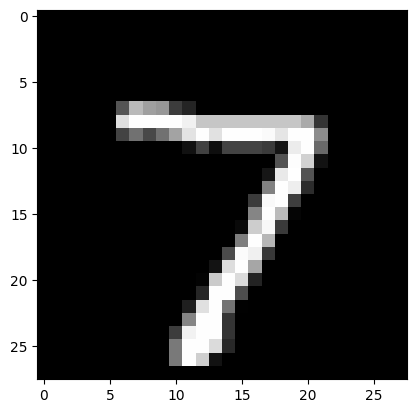

In [33]:
#Lets visualize the image as well
import matplotlib.pyplot as plt
plt.imshow(testX[0],cmap='gray')
plt.show()